## Data from Material Commons

In [5]:
from OpenVisus import *
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

import xarray as xr
from backend_v2 import *
%matplotlib widget


### Opening file 'block_local.nc' reads the data from local idx file
### Opening file 'block_remote.nc' reads the data from Atlantis

In [12]:
dset = xr.open_dataset('block_remote.nc', engine=OpenVisusBackendEntrypoint)
dset=dset.isel(time=0,resolution=30)
dset

None
Adding field  tomo shape  [1, 200, 1200, 1200, 31] dtype  int16 labels  ['time', 'tomo_zdim', 'tomo_ydim', 'tomo_xdim', 'resolution'] Max Resolution  30


<xarray.Dataset>
Dimensions:  (tomo_zdim: 200, tomo_ydim: 1200, tomo_xdim: 1200)
Dimensions without coordinates: tomo_zdim, tomo_ydim, tomo_xdim
Data variables:
    tomo     (tomo_zdim, tomo_ydim, tomo_xdim) int16 ...
Attributes: (12/34)
    zdim_total:                                                           5000
    number_of_files:                                                      25
    zdim_range:                                                           [  ...
    data_description:                                                     Raw...
    voxel_size_xyz:                                                       [0....
    voxel_unit:                                                           mm
    ...                                                                   ...
    history__tomo_float_MgFcbp_gridRes-01:                                dat...
    history__tomo_float_MgFcbp_gridRes-01_output:                         \ni...
    data_min_max:                                                         [ 8...
    data_histogram_binsize:                                               1.0
    data_histogram_offset:                                                0.0
    idx_url:                                                              htt...

In [13]:
dset=reset_coordinates(dset)
tomo=dset.tomo

_raw_indexing_method key (0, slice(None, None, None), slice(None, None, None), slice(None, None, None), 30)
None


interactive(children=(IntSlider(value=0, continuous_update=False, description='Index', max=199), Output()), _d…

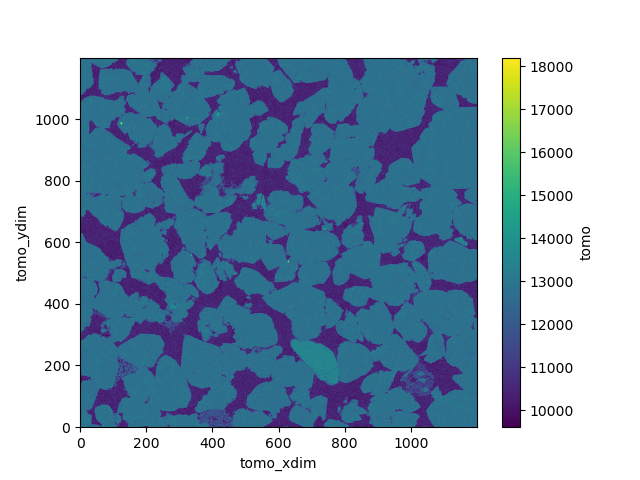

In [14]:

fig, ax = plt.subplots()
img = tomo[0, :, :].plot(ax=ax)

# Function to update the plot based on the first index
def update_plot(index):
    img.set_array(tomo[index, :, :])
    fig.canvas.draw()

# Get the maximum value for the first index
max_index = tomo.shape[0] - 1

# Create an interactive slider
slider = IntSlider(min=0, max=max_index, step=1, description='Index', continuous_update=False)

# Create the interactive plot
interactive_plot = interact(update_plot, index=slider)

# Display the interactive plot
plt.show()
